In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load winequality dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Split data into training and testing sets
X = df.drop(columns=['quality'])
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
# Print classification report
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.10      0.12        10
           5       0.65      0.65      0.65       130
           6       0.53      0.52      0.52       132
           7       0.43      0.50      0.46        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.30      0.30      0.29       320
weighted avg       0.54      0.55      0.55       320



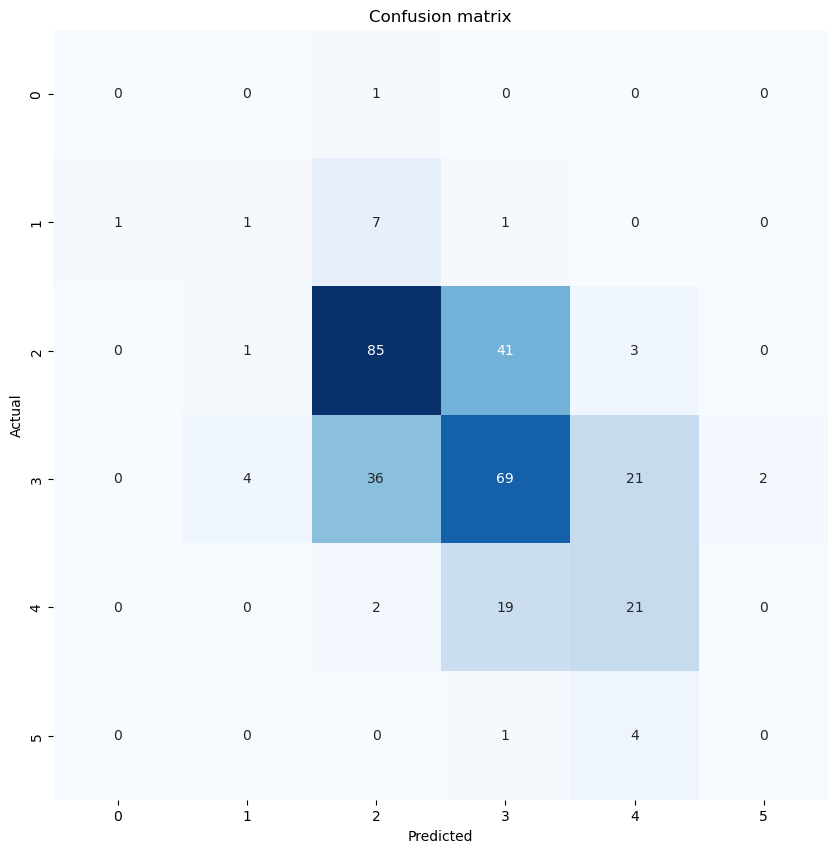

In [5]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

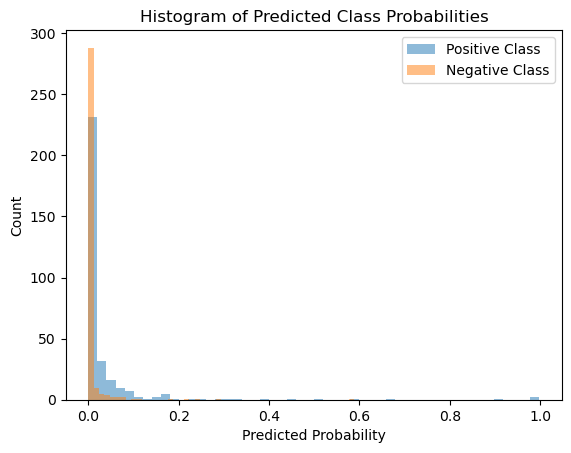

In [6]:
# Plot histogram of predicted class probabilities
proba = nb.predict_proba(X_test)
plt.hist(proba[:, 1], bins=50, alpha=0.5, label='Positive Class')
plt.hist(proba[:, 0], bins=50, alpha=0.5, label='Negative Class')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.legend()
plt.title('Histogram of Predicted Class Probabilities')
plt.show()